In [3]:
!pip install transformers

In [4]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
import seaborn as sns
from transformers import TFAutoModel, AutoTokenizer
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import LabelEncoder
from transformers import BertForSequenceClassification, AdamW
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader, RandomSampler

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd /content/drive/MyDrive/Sentiment\ Analysis

/content/drive/MyDrive/Sentiment Analysis


In [7]:
df = pd.read_csv("sentiment_dataset.csv")

In [8]:
df.head(10)

,text,label
0,यो समान राम्रो रहेछ,1
1,समान राम्रो रहेछ,1
2,राम्रो रहेछ,1
3,यो घडी मलाइ साँच्चिकै सुहाउछ । म यसलाई खरीद गर...,1
4,साँच्चिकै सुहाउछ,1
5,सुहाउछ,1
6,खरीद गर्नेछु,2
7,मूल्य प्रति अनुसार राम्रो उत्पादन,1
8,राम्रो उत्पादन,1
9,ठिकै उत्पादन हो,2


In [9]:
df.sample(20)

,text,label
5392,"""मागेर समाजसेवा हुदैन, यो त आफ्नो पेट पाल्ने त...",0
3123,"जातिय द्वन्दको तयारि त गरेकै हो नि माओवादिले,द...",0
8193,बिदेसी भुमीमा रहेर यो कार्यक्रम हेर्न धेरै आतु...,1
4077,जना नै पत्रु हुन,2
7534,सरकार अविन्ता राउतहरूलाई नागरिकता दे...!,2
640,shubhakamana xa dost,1
1547,नेपालिहरु बिदेश गएर जुठा भाँडा माझेको पिडा कस्...,0
678,Nepali citizenship tehagera UK Citizen,2
2568,"जोडि राम्रो लाग्छ, समाज बिस्तारै परिवर्तन हुन्...",1
2055,आफ्नो दुख-बेदना अरुलाइ सुनाएर के गर्नु रविदाइ ...,1


In [10]:
df['label'].value_counts()

1    3963
0    3697
2    2499
Name: label, dtype: int64

In [11]:
df.isnull().any()

text     False
label    False
dtype: bool

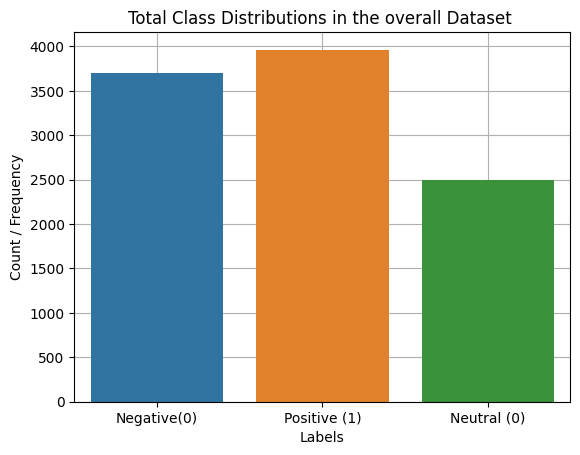

In [12]:
sns.countplot(data = df, x = 'label')
plt.grid()
plt.gca().set_axisbelow(True)  # Ensure that grid lines are plotted below the bars
plt.title("Total Class Distributions in the overall Dataset ")
plt.xlabel("Labels")
plt.ylabel('Count / Frequency')
plt.xticks(ticks = [0,1,2], labels = ['Negative(0)', 'Positive (1)', 'Neutral (0)'])
plt.show()


In [13]:
label_encoder = LabelEncoder()

In [14]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')

In [15]:
print(type(df['text']))

<class 'pandas.core.series.Series'>


In [16]:
# df['text'] = df['text'].tolist()

In [17]:
#TOKENIZING THE TRAINING DATA

In [18]:
tokens = tokenizer.batch_encode_plus(
    df['text'].tolist(),
    padding = True,
    truncation = True,
    max_length = 512,
    return_tensors = 'pt'
)
labels_encoding = label_encoder.fit_transform(df['label'])

In [19]:
print(labels_encoding)

[1 1 1 ... 2 1 1]


In [20]:
#Converting input sequencecs to tensors

In [21]:
tokens

{'input_ids': tensor([[  101, 22951, 78029,  ...,     0,     0,     0],
        [  101, 78029, 71210,  ...,     0,     0,     0],
        [  101, 71210, 63750,  ...,     0,     0,     0],
        ...,
        [  101, 30629, 29161,  ...,     0,     0,     0],
        [  101,   887, 38380,  ...,     0,     0,     0],
        [  101, 75736, 11186,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [22]:
sentences_vectors = torch.tensor(tokens['input_ids'])
attention_masks = torch.tensor(tokens['attention_mask'])
sentence_labels = torch.tensor(df['label'].values)

<ipython-input-22-74aee79ff490>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sentences_vectors = torch.tensor(tokens['input_ids'])
<ipython-input-22-74aee79ff490>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  attention_masks = torch.tensor(tokens['attention_mask'])


In [23]:
dataset = TensorDataset(sentences_vectors, attention_masks, sentence_labels)

In [24]:
dataset

In [25]:
len(dataset)

10159

In [26]:
from sklearn.utils import shuffle

# Shuffle the dataset
data_shuffled = shuffle(dataset, random_state=42)  # You can change the random_state if desired

# Split the shuffled dataset into training and testing sets
train_ratio = 0.8
train_size = int(train_ratio * len(data_shuffled))

train_set = data_shuffled[:train_size]
test_set = data_shuffled[train_size:]


In [27]:
len(train_set)

8127

In [28]:
len(test_set)

2032

In [29]:
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
# Setting device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [31]:
batch_size = 8
learning_rate = 2e-5
epochs = 5

train_dataloader = DataLoader(train_set, sampler=RandomSampler(train_set), batch_size=batch_size)
optimizer = AdamW(model.parameters(), lr=learning_rate, eps=1e-8)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [32]:
from tqdm import tqdm

# Set random seed for reproducibility
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)

# Training
model.train()

for epoch in range(epochs):
    total_loss = 0
    progress_bar = tqdm(train_dataloader, desc=f'Epoch {epoch+1}')

    for batch in progress_bar:
        batch = tuple(t.to(device) for t in batch)
        inputs = {
            'input_ids': batch[0],
            'attention_mask': batch[1],
            'labels': batch[2]
        }

        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Apply gradient clipping if necessary
        optimizer.step()

        progress_bar.set_postfix({'Training Loss': loss.item()})

    average_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch+1}: Average Loss: {average_loss:.4f}')

Epoch 1: 100%|██████████| 1016/1016 [12:39<00:00,  1.34it/s, Training Loss=1.4]


Epoch 1: Average Loss: 0.9097


Epoch 2: 100%|██████████| 1016/1016 [12:41<00:00,  1.33it/s, Training Loss=0.467]


Epoch 2: Average Loss: 0.7420


Epoch 3: 100%|██████████| 1016/1016 [12:41<00:00,  1.33it/s, Training Loss=0.245]


Epoch 3: Average Loss: 0.6038


Epoch 4: 100%|██████████| 1016/1016 [12:41<00:00,  1.33it/s, Training Loss=0.154]


Epoch 4: Average Loss: 0.5070


Epoch 5: 100%|██████████| 1016/1016 [12:41<00:00,  1.33it/s, Training Loss=0.779]

Epoch 5: Average Loss: 0.4613


In [33]:
# Saving the trained model
import os
output_dir = './trained_model'
os.makedirs(output_dir, exist_ok=True)
model.save_pretrained(output_dir)

print('Training completed!')

Training completed!


In [34]:
model.eval()  # Set the model in evaluation mode

correct = 0
total = 0

test_dataloader = DataLoader(test_set, sampler=RandomSampler(test_set), batch_size=batch_size)

with torch.no_grad():  # Disable gradient calculations during evaluation
    progress_bar = tqdm(test_dataloader, desc="Evaluating")
    for batch in progress_bar:
        batch_input_ids, batch_attention_masks, batch_labels = batch

        batch_input_ids = batch_input_ids.to(device)
        batch_attention_masks = batch_attention_masks.to(device)
        batch_labels = batch_labels.to(device)

        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_masks)
        logits = outputs.logits
        _, predicted_labels = torch.max(logits, dim=1)

        total += batch_labels.size(0)
        correct += (predicted_labels == batch_labels).sum().item()

        accuracy = (correct / total) * 100
        progress_bar.set_postfix({'Accuracy': f'{accuracy:.2f}%'})

print(f"Accuracy: {accuracy:.2f}%")

Evaluating: 100%|██████████| 254/254 [01:04<00:00,  3.92it/s, Accuracy=70.18%]

Accuracy: 70.18%


In [35]:
#SAVING MODEL
model.save_pretrained("my-model")

# Download
import shutil

model_directory = "my-model"

# Zip the model directory
shutil.make_archive("my-model", 'zip', model_directory)

'/content/drive/MyDrive/Sentiment Analysis/my-model.zip'